In [1]:
import tensorflow as tf
import numpy as np
from os import listdir
import cv2,os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path ='/content/drive/My Drive/Covid_detection/datasets'
categories=os.listdir(data_path)

labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)


{'Covid19 Positive': 0, 'Covid19 Negative': 1}
['Covid19 Positive', 'Covid19 Negative']
[0, 1]


In [4]:
img_size=100
data=[]
target=[]

for category in categories:
  folder_path=os.path.join(data_path,category)
  img_names=os.listdir(folder_path)

  for img_name in img_names:
    img_path=os.path.join(folder_path,img_name)
    img=cv2.imread(img_path)

    try:
      #Converting the image into grayscale
      gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      #Resizing the gray scale into 100x100, since we need a fixed size for all the images
      resized=cv2.resize(gray,(img_size,img_size))
      data.append(resized)
      #Appending the image and the label(categorized) into the list(dataset)
      target.append(label_dict[category])

    except Exception as e:
      #If any exception raised, the exception will be printed here. And then it will pass to the next image
      print('Exception:',e)

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.

In [5]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [6]:
np.save('data', data)
np.save('target', new_target)

In [7]:
data=np.load('data.npy')
target=np.load('target.npy')

In [8]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, Activation, MaxPooling2D
from keras.utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint

input_shape=data.shape[1:]
inp=Input(shape=input_shape)
convs=[]

parrallel_kernals=[3,5,7]

for k in range(len(parrallel_kernals)):

  conv = Conv2D(128, parrallel_kernals[k],padding='same',activation='relu', input_shape=input_shape,strides=1)(inp)
  convs.append(conv)

out = Concatenate()(convs)
conv_model = Model(inputs=inp, outputs=out)

model = Sequential()
model.add(conv_model)

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, input_dim=128, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_1 (Functional)    (None, 100, 100, 384)     11008     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 98, 64)        221248    
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0

In [9]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [10]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)


Epoch 1/20
17/17 [==============================] - ETA: 0s - loss: 0.6046 - accuracy: 0.7638 WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model/assets
17/17 [==============================] - 184s 11s/step - loss: 0.6046 - accuracy: 0.7638 - val_loss: 0.5391 - val_accuracy: 0.8475
Epoch 2/20
17/17 [==============================] - 181s 11s/step - loss: 0.5377 - accuracy: 0.7810 - val_loss: 0.4488 - val_accuracy: 0.8475
Epoch 3/20
17/17 [==============================] - 180s 11s/step - loss: 0.4444 - accuracy: 0.7943 - v

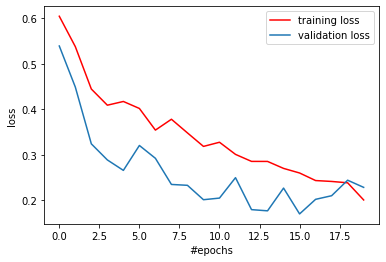

In [11]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

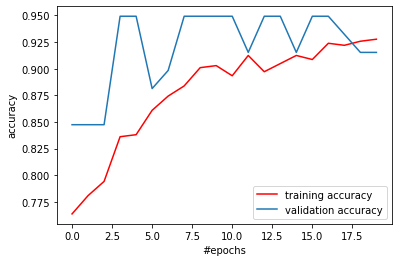

In [12]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('#epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [13]:
print(model.evaluate(test_data,test_target))

3/3 [==============================] - 3s 1s/step - loss: 0.2964 - accuracy: 0.8769
[0.2963939309120178, 0.8769230842590332]


In [14]:
tf.keras.models.save_model(model,'my_model2.hdf5')